# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

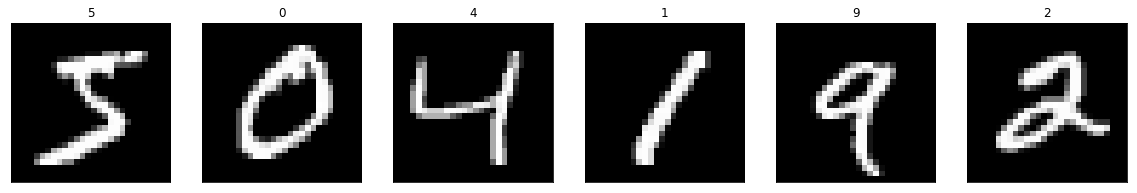

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

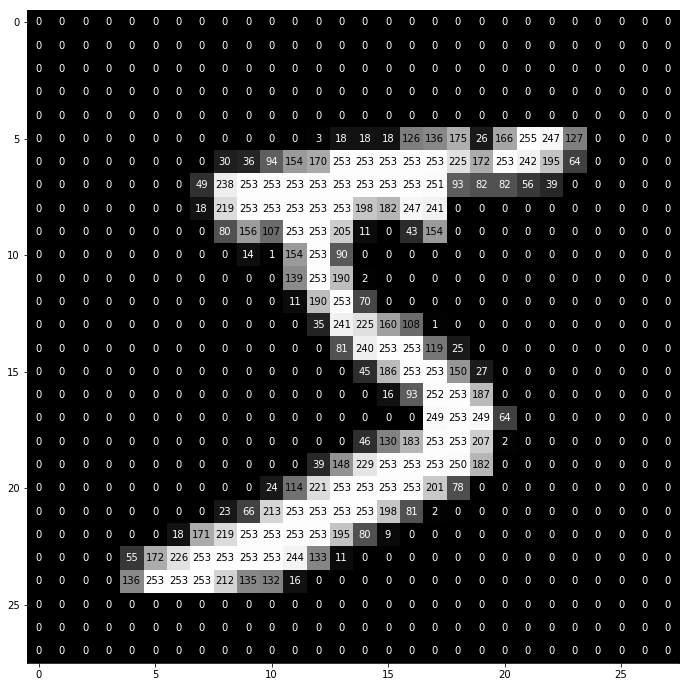

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    n_rows, n_cols = img.shape
    thresh = img.max()/2.5
    height_range = [4]
    for r in range(n_rows):
        for c in range(n_cols):
            str_x_y = str(round(img[r][c],2))
            ax.annotate(str_x_y, xy=(c,r),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[r][c]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [5]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [9]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(activation = 'relu', dropout = 0.2, 
                 neurons = 512, optimizer = 'rmsprop'):
    # define the model
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:], name = 'flatten1'))
    model.add(Dense(neurons, activation=activation, name = 'dense1'))
    model.add(Dropout(dropout, name = 'dropout1'))
    model.add(Dense(neurons, activation=activation, name = 'activation1'))
    model.add(Dropout(dropout, name = 'dropout2'))
    model.add(Dense(10, activation='softmax', name = 'activation2'))

    # summarize the model
    #model.summary()

    ### 7. Compile the Model

    # compile the model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    
    return model

In [10]:
create_model().layers[1].weights[1].name

'dense1/bias:0'

In [11]:
model = KerasClassifier(build_fn = create_model)

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [12]:
# evaluate test accuracy
score = create_model().evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 13.2200%


In [13]:
neurons          = [128, 512]
dropout          = [0.0, 0.2, 0.5]
activation       = ['linear', 'softmax', 'relu']
optimizer        = ['rmsprop', 'sgd']
batch_size       = [64,128]
epochs           = [5]
validation_split = [0.2]
param_grid       = dict(neurons          = neurons, 
                        dropout          = dropout, 
                        epochs           = epochs, 
                        validation_split = validation_split,
                        activation       = activation,
                        optimizer        = optimizer, 
                        batch_size       = batch_size)
grid             = GridSearchCV(estimator  = model, 
                                param_grid = param_grid,
                                n_jobs     = 1)

In [15]:
#optimizer[0].get_weights()

### 9. Train the Model

In [18]:
%%time
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath = 'mnist.model.best.hdf5',
                               verbose = 1, 
                               save_best_only = True)
grid_result  = grid.fit(X_train, y_train, 
                        callbacks = [checkpointer],
                        verbose = 2, shuffle = True)

Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 3s - loss: 0.4212 - acc: 0.8773 - val_loss: 0.3097 - val_acc: 0.9110

Epoch 00001: val_loss improved from inf to 0.30969, saving model to mnist.model.best.hdf5
Epoch 2/5
 - 2s - loss: 0.3342 - acc: 0.9043 - val_loss: 0.2933 - val_acc: 0.9149

Epoch 00002: val_loss improved from 0.30969 to 0.29332, saving model to mnist.model.best.hdf5
Epoch 3/5
 - 2s - loss: 0.3180 - acc: 0.9106 - val_loss: 0.3019 - val_acc: 0.9153

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 2s - loss: 0.3066 - acc: 0.9133 - val_loss: 0.2770 - val_acc: 0.9217

Epoch 00004: val_loss improved from 0.29332 to 0.27695, saving model to mnist.model.best.hdf5
Epoch 5/5
 - 3s - loss: 0.3007 - acc: 0.9130 - val_loss: 0.2805 - val_acc: 0.9227

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 1s 29us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 3s - loss: 0.4141 - acc: 0.8798 - val_loss: 0.2943 - val_acc

 - 6s - loss: 0.3541 - acc: 0.9008 - val_loss: 0.3082 - val_acc: 0.9135

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 6s - loss: 0.3322 - acc: 0.9062 - val_loss: 0.2966 - val_acc: 0.9177

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 8s - loss: 0.3186 - acc: 0.9102 - val_loss: 0.2892 - val_acc: 0.9181

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 3s 76us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 8s - loss: 0.7012 - acc: 0.8258 - val_loss: 0.4461 - val_acc: 0.8781

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 7s - loss: 0.3996 - acc: 0.8899 - val_loss: 0.3788 - val_acc: 0.8926

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 7s - loss: 0.3553 - acc: 0.9008 - val_loss: 0.3537 - val_acc: 0.8971

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 7s - loss: 0.3331 - acc: 0.9073 - val_loss: 0.3406 - val_acc: 0.9019

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 7s - loss: 0.3191 - acc: 0.9110 - val_los


Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 4s 93us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 9s - loss: 0.7537 - acc: 0.7925 - val_loss: 0.3924 - val_acc: 0.8938

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 7s - loss: 0.4328 - acc: 0.8772 - val_loss: 0.3306 - val_acc: 0.9079

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 8s - loss: 0.3849 - acc: 0.8889 - val_loss: 0.3083 - val_acc: 0.9121

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 7s - loss: 0.3621 - acc: 0.8957 - val_loss: 0.2960 - val_acc: 0.9171

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 7s - loss: 0.3484 - acc: 0.9003 - val_loss: 0.2896 - val_acc: 0.9165

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 3s 84us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 9s - loss: 0.7527 - acc: 0.7905 - val_loss: 0.3890 - val_acc: 0.8980

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 8s -

 - 11s - loss: 0.4598 - acc: 0.8792 - val_loss: 0.3134 - val_acc: 0.9137

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 12s - loss: 0.4350 - acc: 0.8833 - val_loss: 0.2999 - val_acc: 0.9161

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 12s - loss: 0.4164 - acc: 0.8867 - val_loss: 0.3220 - val_acc: 0.9114

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 4s 111us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 14s - loss: 0.5880 - acc: 0.8383 - val_loss: 0.4432 - val_acc: 0.8820

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 11s - loss: 0.4913 - acc: 0.8725 - val_loss: 0.3964 - val_acc: 0.9000

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 10s - loss: 0.4474 - acc: 0.8798 - val_loss: 0.4009 - val_acc: 0.9005

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 11s - loss: 0.4328 - acc: 0.8854 - val_loss: 0.4216 - val_acc: 0.8871

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 10s - loss: 0.4129 - acc: 0.8896 

40000/40000 [==============================] - 1s 21us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 8s - loss: 0.4995 - acc: 0.8510 - val_loss: 0.3256 - val_acc: 0.9055

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 6s - loss: 0.3856 - acc: 0.8864 - val_loss: 0.3457 - val_acc: 0.8998

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 6s - loss: 0.3624 - acc: 0.8972 - val_loss: 0.3102 - val_acc: 0.9143

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 6s - loss: 0.3390 - acc: 0.9027 - val_loss: 0.2843 - val_acc: 0.9189

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 6s - loss: 0.3287 - acc: 0.9058 - val_loss: 0.2963 - val_acc: 0.9193

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 2s 60us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 8s - loss: 0.4858 - acc: 0.8574 - val_loss: 0.3175 - val_acc: 0.9131

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 6s - loss: 0.3772 - acc: 0.8921 - val_loss:

 - 2s - loss: 0.5047 - acc: 0.8525 - val_loss: 0.3717 - val_acc: 0.8984

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 2s - loss: 0.4593 - acc: 0.8645 - val_loss: 0.3455 - val_acc: 0.9045

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 2s - loss: 0.4296 - acc: 0.8741 - val_loss: 0.3295 - val_acc: 0.9074

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 1s 27us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 4s - loss: 1.1806 - acc: 0.6503 - val_loss: 0.6537 - val_acc: 0.8403

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 2s - loss: 0.6096 - acc: 0.8279 - val_loss: 0.4882 - val_acc: 0.8676

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 2s - loss: 0.5019 - acc: 0.8577 - val_loss: 0.4290 - val_acc: 0.8815

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 2s - loss: 0.4583 - acc: 0.8675 - val_loss: 0.3980 - val_acc: 0.8892

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 2s - loss: 0.4281 - acc: 0.8762 - val_los

40000/40000 [==============================] - 1s 26us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 5s - loss: 1.4303 - acc: 0.5229 - val_loss: 0.6278 - val_acc: 0.8570

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 2s - loss: 0.8145 - acc: 0.7384 - val_loss: 0.4594 - val_acc: 0.8824

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 2s - loss: 0.6763 - acc: 0.7831 - val_loss: 0.3959 - val_acc: 0.8945

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 2s - loss: 0.6202 - acc: 0.8068 - val_loss: 0.3664 - val_acc: 0.8998

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 2s - loss: 0.5799 - acc: 0.8218 - val_loss: 0.3503 - val_acc: 0.9039

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 1s 32us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 5s - loss: 1.4528 - acc: 0.5183 - val_loss: 0.6569 - val_acc: 0.8496

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 2s - loss: 0.8205 - acc: 0.7378 - val_loss:

 - 3s - loss: 1.1802 - acc: 0.7694 - val_loss: 0.9885 - val_acc: 0.7929

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 3s - loss: 0.8619 - acc: 0.7917 - val_loss: 0.7405 - val_acc: 0.7937

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 2s 47us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 6s - loss: 2.2642 - acc: 0.1895 - val_loss: 2.1919 - val_acc: 0.6946

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 3s - loss: 2.0355 - acc: 0.8436 - val_loss: 1.8477 - val_acc: 0.9076

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 3s - loss: 1.6191 - acc: 0.9163 - val_loss: 1.3912 - val_acc: 0.9166

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 3s - loss: 1.1650 - acc: 0.9242 - val_loss: 0.9637 - val_acc: 0.9199

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 3s - loss: 0.7838 - acc: 0.9300 - val_loss: 0.6494 - val_acc: 0.9223

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 2s 47us


Epoch 00001: val_loss did not improve
Epoch 2/5
 - 4s - loss: 2.0796 - acc: 0.5500 - val_loss: 1.8950 - val_acc: 0.6710

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 4s - loss: 1.7719 - acc: 0.5577 - val_loss: 1.5098 - val_acc: 0.6725

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 4s - loss: 1.4927 - acc: 0.5635 - val_loss: 1.1889 - val_acc: 0.6876

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 4s - loss: 1.2912 - acc: 0.5664 - val_loss: 0.9721 - val_acc: 0.6907

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 2s 52us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 7s - loss: 2.2708 - acc: 0.2422 - val_loss: 2.2087 - val_acc: 0.5369

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 4s - loss: 2.0913 - acc: 0.6087 - val_loss: 1.9132 - val_acc: 0.7538

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 4s - loss: 1.7781 - acc: 0.6360 - val_loss: 1.5144 - val_acc: 0.7900

Epoch 00003: val_loss did not improve
Epoch


Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 5s 133us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 13s - loss: 2.3020 - acc: 0.1135 - val_loss: 2.3017 - val_acc: 0.1130

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 9s - loss: 2.3013 - acc: 0.1143 - val_loss: 2.3014 - val_acc: 0.1130

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 9s - loss: 2.3011 - acc: 0.1143 - val_loss: 2.3014 - val_acc: 0.1130

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 8s - loss: 2.3009 - acc: 0.1143 - val_loss: 2.3014 - val_acc: 0.1130

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 8s - loss: 2.3009 - acc: 0.1143 - val_loss: 2.3014 - val_acc: 0.1130

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 4s 104us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 8s - loss: 2.2816 - acc: 0.1898 - val_loss: 2.2416 - val_acc: 0.1960

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 4

 - 10s - loss: 2.3015 - acc: 0.1126 - val_loss: 2.3017 - val_acc: 0.1074

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 10s - loss: 2.3014 - acc: 0.1126 - val_loss: 2.3017 - val_acc: 0.1074

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 10s - loss: 2.3014 - acc: 0.1126 - val_loss: 2.3017 - val_acc: 0.1074

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 6s 142us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 14s - loss: 2.3020 - acc: 0.1093 - val_loss: 2.3018 - val_acc: 0.1074

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 9s - loss: 2.3014 - acc: 0.1125 - val_loss: 2.3016 - val_acc: 0.1074

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 9s - loss: 2.3012 - acc: 0.1125 - val_loss: 2.3016 - val_acc: 0.1074

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 10s - loss: 2.3011 - acc: 0.1125 - val_loss: 2.3016 - val_acc: 0.1074

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 10s - loss: 2.3010 - acc: 0.1125 - 

40000/40000 [==============================] - 3s 87us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 15s - loss: 2.2959 - acc: 0.1135 - val_loss: 2.2828 - val_acc: 0.1130

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 8s - loss: 2.2465 - acc: 0.2096 - val_loss: 2.1976 - val_acc: 0.5309

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 8s - loss: 2.1229 - acc: 0.6399 - val_loss: 2.0407 - val_acc: 0.6591

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 9s - loss: 1.9392 - acc: 0.6676 - val_loss: 1.8383 - val_acc: 0.6763

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 9s - loss: 1.7236 - acc: 0.6757 - val_loss: 1.6190 - val_acc: 0.6616

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 4s 90us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 13s - loss: 2.3024 - acc: 0.1092 - val_loss: 2.3022 - val_acc: 0.1074

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 7s - loss: 2.3020 - acc: 0.1126 - val_los

 - 9s - loss: 2.0107 - acc: 0.4174 - val_loss: 1.8930 - val_acc: 0.4986

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 9s - loss: 1.8577 - acc: 0.4201 - val_loss: 1.7110 - val_acc: 0.4995

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 3s 86us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 15s - loss: 2.2974 - acc: 0.1118 - val_loss: 2.2870 - val_acc: 0.1074

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 9s - loss: 2.2582 - acc: 0.2235 - val_loss: 2.2151 - val_acc: 0.4376

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 9s - loss: 2.1561 - acc: 0.4847 - val_loss: 2.0714 - val_acc: 0.5783

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 9s - loss: 2.0034 - acc: 0.5475 - val_loss: 1.8797 - val_acc: 0.6567

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 9s - loss: 1.8325 - acc: 0.5516 - val_loss: 1.6687 - val_acc: 0.6613

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 4s 96u


Epoch 00001: val_loss did not improve
Epoch 2/5
 - 3s - loss: 2.3016 - acc: 0.1140 - val_loss: 2.3017 - val_acc: 0.1130

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 3s - loss: 2.3013 - acc: 0.1145 - val_loss: 2.3015 - val_acc: 0.1130

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 3s - loss: 2.3012 - acc: 0.1143 - val_loss: 2.3014 - val_acc: 0.1130

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 3s - loss: 2.3012 - acc: 0.1143 - val_loss: 2.3014 - val_acc: 0.1130

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 2s 43us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 17s - loss: 2.2988 - acc: 0.1121 - val_loss: 2.2916 - val_acc: 0.1074

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 10s - loss: 2.2737 - acc: 0.1942 - val_loss: 2.2448 - val_acc: 0.1074

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 9s - loss: 2.2129 - acc: 0.3393 - val_loss: 2.1494 - val_acc: 0.5761

Epoch 00003: val_loss did not improve
Epo


Epoch 00003: val_loss did not improve
Epoch 4/5
 - 4s - loss: 0.3423 - acc: 0.9026 - val_loss: 0.2901 - val_acc: 0.9203

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 4s - loss: 0.3150 - acc: 0.9094 - val_loss: 0.2703 - val_acc: 0.9246

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 3s 69us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 10s - loss: 1.2591 - acc: 0.6777 - val_loss: 0.5832 - val_acc: 0.8714

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 3s - loss: 0.5038 - acc: 0.8697 - val_loss: 0.3808 - val_acc: 0.8999

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 3s - loss: 0.3872 - acc: 0.8938 - val_loss: 0.3197 - val_acc: 0.9105

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 5s - loss: 0.3392 - acc: 0.9046 - val_loss: 0.2935 - val_acc: 0.9161

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 4s - loss: 0.3098 - acc: 0.9122 - val_loss: 0.2722 - val_acc: 0.9235

Epoch 00005: val_loss did not improve
4000

40000/40000 [==============================] - 2s 60us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 11s - loss: 0.4203 - acc: 0.8739 - val_loss: 0.2137 - val_acc: 0.9346

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 4s - loss: 0.2009 - acc: 0.9401 - val_loss: 0.1461 - val_acc: 0.9560

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 4s - loss: 0.1473 - acc: 0.9548 - val_loss: 0.1345 - val_acc: 0.9617

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 4s - loss: 0.1225 - acc: 0.9634 - val_loss: 0.1207 - val_acc: 0.9664

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 4s - loss: 0.1035 - acc: 0.9687 - val_loss: 0.1258 - val_acc: 0.9689

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 2s 60us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 12s - loss: 1.4237 - acc: 0.5789 - val_loss: 0.6266 - val_acc: 0.8682

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 4s - loss: 0.6829 - acc: 0.7957 - val_los

 - 4s - loss: 0.3033 - acc: 0.9136 - val_loss: 0.1586 - val_acc: 0.9551

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 4s - loss: 0.2745 - acc: 0.9223 - val_loss: 0.1463 - val_acc: 0.9595

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 4s - loss: 0.2576 - acc: 0.9292 - val_loss: 0.1407 - val_acc: 0.9633

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 3s 65us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 11s - loss: 0.6921 - acc: 0.7852 - val_loss: 0.2223 - val_acc: 0.9344

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 4s - loss: 0.3538 - acc: 0.8980 - val_loss: 0.1754 - val_acc: 0.9503

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 4s - loss: 0.2922 - acc: 0.9177 - val_loss: 0.1579 - val_acc: 0.9566

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 4s - loss: 0.2688 - acc: 0.9266 - val_loss: 0.1550 - val_acc: 0.9587

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 4s - loss: 0.2494 - acc: 0.9327 - val_lo

40000/40000 [==============================] - 6s 148us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 22s - loss: 1.4442 - acc: 0.5505 - val_loss: 0.6462 - val_acc: 0.8470

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 11s - loss: 0.7166 - acc: 0.7778 - val_loss: 0.4434 - val_acc: 0.8800

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 9s - loss: 0.5659 - acc: 0.8283 - val_loss: 0.3766 - val_acc: 0.8928

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 9s - loss: 0.4889 - acc: 0.8542 - val_loss: 0.3378 - val_acc: 0.9018

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 10s - loss: 0.4445 - acc: 0.8680 - val_loss: 0.3120 - val_acc: 0.9075

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 5s 116us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 10s - loss: 0.4038 - acc: 0.8841 - val_loss: 0.2023 - val_acc: 0.9420

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 2s - loss: 0.1834 - acc: 0.9448 - val

 - 6s - loss: 0.4752 - acc: 0.8781 - val_loss: 0.3824 - val_acc: 0.9016

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 6s - loss: 0.4036 - acc: 0.8910 - val_loss: 0.3362 - val_acc: 0.9114

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 6s - loss: 0.3646 - acc: 0.9003 - val_loss: 0.3116 - val_acc: 0.9150

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 4s 112us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 16s - loss: 1.4999 - acc: 0.6747 - val_loss: 0.8253 - val_acc: 0.8561

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 7s - loss: 0.6573 - acc: 0.8531 - val_loss: 0.4789 - val_acc: 0.8898

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 6s - loss: 0.4700 - acc: 0.8816 - val_loss: 0.3836 - val_acc: 0.9014

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 7s - loss: 0.3988 - acc: 0.8937 - val_loss: 0.3380 - val_acc: 0.9101

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 7s - loss: 0.3599 - acc: 0.9026 - val_l

40000/40000 [==============================] - 5s 129us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 18s - loss: 0.3283 - acc: 0.8981 - val_loss: 0.1691 - val_acc: 0.9493

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 9s - loss: 0.1315 - acc: 0.9592 - val_loss: 0.1124 - val_acc: 0.9646

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 8s - loss: 0.0879 - acc: 0.9725 - val_loss: 0.0987 - val_acc: 0.9705

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 9s - loss: 0.0647 - acc: 0.9793 - val_loss: 0.1145 - val_acc: 0.9686

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 9s - loss: 0.0527 - acc: 0.9837 - val_loss: 0.1032 - val_acc: 0.9735

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 5s 121us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 16s - loss: 1.6413 - acc: 0.5619 - val_loss: 0.8993 - val_acc: 0.8389

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 7s - loss: 0.7842 - acc: 0.8018 - val_l

 - 9s - loss: 0.1379 - acc: 0.9590 - val_loss: 0.1049 - val_acc: 0.9715

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 9s - loss: 0.1186 - acc: 0.9650 - val_loss: 0.1001 - val_acc: 0.9722

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 5s 114us/step
Train on 32000 samples, validate on 8000 samples
Epoch 1/5
 - 18s - loss: 0.4319 - acc: 0.8668 - val_loss: 0.1659 - val_acc: 0.9515

Epoch 00001: val_loss did not improve
Epoch 2/5
 - 9s - loss: 0.2034 - acc: 0.9383 - val_loss: 0.1180 - val_acc: 0.9657

Epoch 00002: val_loss did not improve
Epoch 3/5
 - 9s - loss: 0.1565 - acc: 0.9523 - val_loss: 0.1065 - val_acc: 0.9696

Epoch 00003: val_loss did not improve
Epoch 4/5
 - 9s - loss: 0.1307 - acc: 0.9614 - val_loss: 0.1022 - val_acc: 0.9725

Epoch 00004: val_loss did not improve
Epoch 5/5
 - 9s - loss: 0.1154 - acc: 0.9663 - val_loss: 0.1019 - val_acc: 0.9716

Epoch 00005: val_loss did not improve
40000/40000 [==============================] - 5s 11

In [19]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.973500 using {'activation': 'relu', 'batch_size': 64, 'dropout': 0.0, 'epochs': 5, 'neurons': 512, 'optimizer': 'rmsprop', 'validation_split': 0.2}


### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [25]:
import h5py
file_name = 'mnist.model.best.hdf5'
f = h5py.File(file_name, 'r')
for key in f.keys():
    print(key)
    
# List all groups
group = f[key]
#Checkout what keys are inside that group.
for key in group.keys():
    print(key)

# Get the data
data = group['training_212']
#Do whatever you want with data

model_weights
optimizer_weights
training_212


In [31]:
# load the weights that yielded the best validation accuracy
c_m = create_model(activation = 'relu', dropout = 0.0, 
                 neurons = 512, optimizer = 'rmsprop')
c_m.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [32]:
# evaluate test accuracy
score = c_m.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.7000%
